### Подготовка датасета

In [109]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [110]:
dataset = pd.read_csv('/content/drive/MyDrive/Data_Analysis/Killers_with_frags.csv')
dataset = dataset.drop('Имя', axis=1)

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

enc_ = OrdinalEncoder()

dataset[['Религия', 'Национальность', 'Пол', 'Маньяк']] = enc_.fit_transform(dataset[['Религия', 'Национальность', 'Пол', 'Маньяк']])
dataset.head()

,Год рождения,Религия,Национальность,Пол,Работа,тюремное заключение,дефект речи,травма головы,Воровал,Был подвержен изнасилованию,...,Проблемы в школе,Жил с детьми,физический дефект,посешал психолога,Были попытки самоубийства,посещал судебно-медицинскую клинику,Жертвы,Пойман на нарушении,Возраст первого преступления,Маньяк
0,1963,0.0,0.0,1.0,0,1,0,0,0,0,...,1,0,0,0,0,0,3,1,18,2.0
1,1927,0.0,0.0,1.0,1,0,0,0,0,1,...,1,0,0,1,0,0,4,1,31,2.0
2,1942,4.0,0.0,1.0,1,1,0,1,0,1,...,1,0,1,1,0,0,33,3,36,2.0
3,1946,0.0,0.0,1.0,1,1,0,0,1,1,...,0,0,1,0,0,0,30,3,28,2.0
4,1935,0.0,0.0,1.0,0,1,0,1,1,1,...,0,1,1,1,0,1,3,1,38,2.0


In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
dataset.head()


,Год рождения,Религия,Национальность,Пол,Работа,тюремное заключение,дефект речи,травма головы,Воровал,Был подвержен изнасилованию,...,Проблемы в школе,Жил с детьми,физический дефект,посешал психолога,Были попытки самоубийства,посещал судебно-медицинскую клинику,Жертвы,Пойман на нарушении,Возраст первого преступления,Маньяк
0,1963,0.0,0.0,1.0,0,1,0,0,0,0,...,1,0,0,0,0,0,3,1,18,2.0
1,1927,0.0,0.0,1.0,1,0,0,0,0,1,...,1,0,0,1,0,0,4,1,31,2.0
2,1942,4.0,0.0,1.0,1,1,0,1,0,1,...,1,0,1,1,0,0,33,3,36,2.0
3,1946,0.0,0.0,1.0,1,1,0,0,1,1,...,0,0,1,0,0,0,30,3,28,2.0
4,1935,0.0,0.0,1.0,0,1,0,1,1,1,...,0,1,1,1,0,1,3,1,38,2.0


In [113]:
vals = dataset["Маньяк"].unique()
vals

array([2., 0., 1.])

In [114]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем
cols_for_clusters = [
    'Год рождения',
    'Религия',
    'Национальность',
    'Пол',
    'Работа',
    'тюремное заключение',
    'дефект речи',
    'травма головы',
    'Воровал',
    'Был подвержен изнасилованию',
    'родители наркоманы',
    'злоупотребление наркотиками \ алкоголем',
    'Проблемы в школе',
    'Жил с детьми',
    'физический дефект',
    'посешал психолога',
    'Были попытки самоубийства',
    'посещал судебно-медицинскую клинику',
    'Жертвы',
    'Пойман на нарушении',
    'Возраст первого преступления'
    ]

df= dataset[cols_for_clusters].copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных

In [115]:
df.head()

,Год рождения,Религия,Национальность,Пол,Работа,тюремное заключение,дефект речи,травма головы,Воровал,Был подвержен изнасилованию,...,злоупотребление наркотиками \ алкоголем,Проблемы в школе,Жил с детьми,физический дефект,посешал психолога,Были попытки самоубийства,посещал судебно-медицинскую клинику,Жертвы,Пойман на нарушении,Возраст первого преступления
0,1963,0.0,0.0,1.0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,3,1,18
1,1927,0.0,0.0,1.0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,4,1,31
2,1942,4.0,0.0,1.0,1,1,0,1,0,1,...,0,1,0,1,1,0,0,33,3,36
3,1946,0.0,0.0,1.0,1,1,0,0,1,1,...,0,0,0,1,0,0,0,30,3,28
4,1935,0.0,0.0,1.0,0,1,0,1,1,1,...,0,0,1,1,1,0,1,3,1,38


In [116]:
X = df
y = dataset["Маньяк"].replace(vals, [0, 1, 2])
yvals = dataset["Маньяк"]

### Распространенные алгоритмы кластеризации



In [117]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

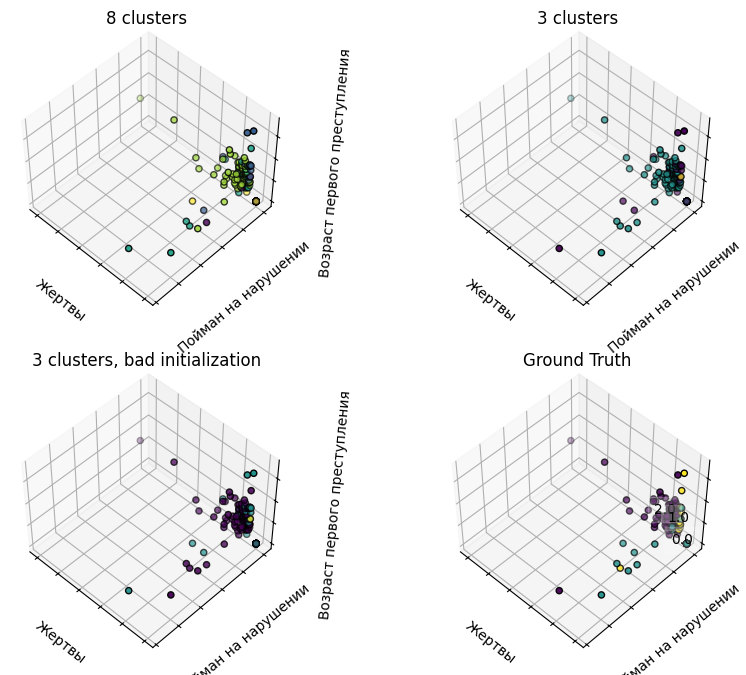

In [118]:
estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["Жертвы"], X["Пойман на нарушении"], X["Возраст первого преступления"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Жертвы")
    ax.set_ylabel("Пойман на нарушении")
    ax.set_zlabel("Возраст первого преступления")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1), (vals[2], 2)]:
    ds = dataset[dataset["Маньяк"]==name]
    ax.text3D(
        ds["Жертвы"].mean(),
        ds["Пойман на нарушении"].mean(),
        ds["Возраст первого преступления"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["Жертвы"], X["Пойман на нарушении"], X["Возраст первого преступления"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Жертвы")
ax.set_ylabel("Пойман на нарушении")
ax.set_zlabel("Возраст первого преступления")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [119]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [120]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n




In [121]:
best_metric

[6,
 0.4060179597559941,
 0.2842123782958568,
 array([[1.94732394e+03, 1.11267606e+00, 4.78873239e-01, 9.15492958e-01,
         3.09859155e-01, 6.90140845e-01, 2.81690141e-02, 2.39436620e-01,
         3.09859155e-01, 6.76056338e-01, 3.38028169e-01, 4.50704225e-01,
         6.90140845e-01, 2.11267606e-01, 4.64788732e-01, 4.36619718e-01,
         1.54929577e-01, 2.67605634e-01, 8.52112676e+00, 1.47887324e+00,
         2.90563380e+01],
        [1.73183333e+03, 4.00000000e+00, 2.00000000e+00, 8.33333333e-01,
         6.66666667e-01, 3.33333333e-01, 1.66666667e-01, 3.33333333e-01,
         3.33333333e-01, 0.00000000e+00, 0.00000000e+00, 5.00000000e-01,
         1.00000000e+00, 1.66666667e-01, 3.33333333e-01, 5.55111512e-17,
         1.38777878e-17, 2.77555756e-17, 0.00000000e+00, 1.66666667e-01,
         5.00000000e+00],
        [1.83175000e+03, 2.58333333e+00, 1.50000000e+00, 8.75000000e-01,
         3.33333333e-01, 2.91666667e-01, 2.50000000e-01, 1.25000000e-01,
         1.25000000e-01, 8

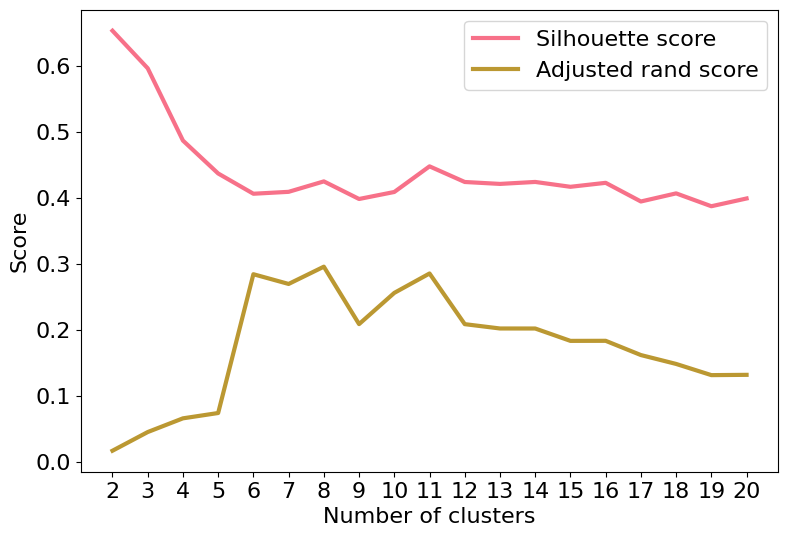

In [122]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()


#plt.figure(figsize=(9, 6))
#plt.plot(n_clusters, within_cluster_dist_values, linewidth=3, label='Within-cluster distance')
#plt.xlabel('Number of clusters', size=16)
#plt.ylabel('Score', size=16)
#plt.xticks(n_clusters, size=16)
#plt.yticks(size=16)
#plt.legend(loc='best', fontsize=16)

#plt.show()

In [123]:
from scipy.cluster.hierarchy import linkage, dendrogram

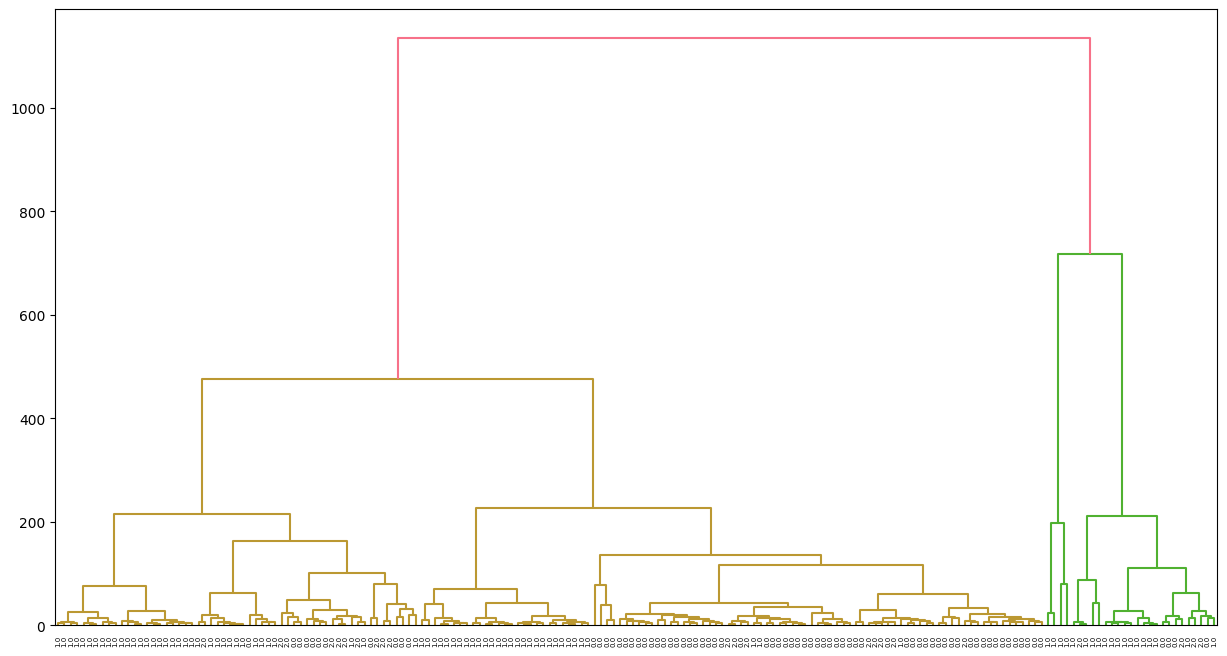

In [124]:
samples = df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')
# попробуйте с другими методами
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [125]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [126]:
mins = X.shape[1]

['y', 'b', 'g', 'r']


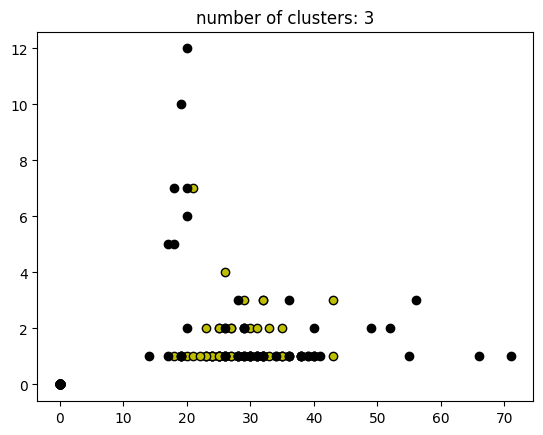

In [149]:
db = DBSCAN(eps=9, min_samples=9).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["Возраст первого преступления"], xy["Пойман на нарушении"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["Возраст первого преступления"], xy["Пойман на нарушении"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


Черные точки - это выбросы. Меняя значение eps и min_samples, мы можем контролировать результат работы алгоритма

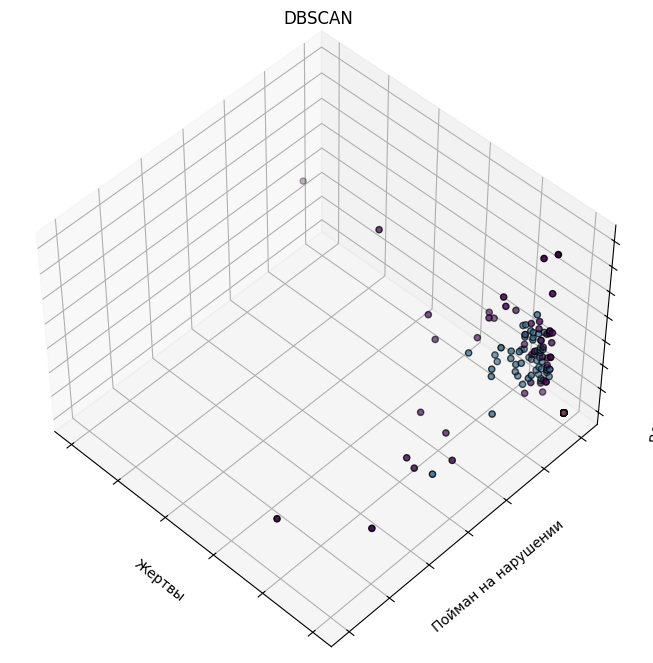

In [151]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["Жертвы"], X["Пойман на нарушении"], X["Возраст первого преступления"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Жертвы")
ax.set_ylabel("Пойман на нарушении")
ax.set_zlabel("Возраст первого преступления")
ax.set_title("DBSCAN")

plt.show()

In [152]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.18
Adjusted Rand Index: 0.17
